# Metody Obliczeniowe w Nauce i Technice Laboratorium 7
## Dekompozycja spektralna
### Paweł Gorgolewski

In [106]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.linalg import lu_factor, lu_solve

In [107]:
def power_method(A, eps=1e-9, iterations=10000):
    n = len(A)
    x = np.random.rand(n)
    count = 0
    while count < iterations:
        count+=1
        x_tmp = np.dot(A, x)
        norm = np.linalg.norm(x_tmp, np.inf)
        x_norm = x_tmp / norm
        if np.linalg.norm(x_norm-x, np.inf) < eps:
            x = x_norm
            break

        x = x_norm

    return count, norm, (x/np.linalg.norm(x))

In [108]:
A = np.random.rand(3,3)

np_time = time.time()
eig_value, eig_vectors = np.linalg.eig(A)
np_time = time.time() - np_time

power_time = time.time()
iterations, power_value, power_vector = power_method(A)
power_time = time.time()-power_time

print(f"VALUES\n\tnumpy: {eig_value}\n\tpower_method {power_value}")
print(f"VECTORS\n\tnumpy: {eig_vectors}\n\tpower_method {power_vector}")
print(f"TIMES\n\tnumpy {np_time}\n\tpower_method {power_time}")

VALUES
	numpy: [1.77970672+0.j         0.48807366+0.33312899j 0.48807366-0.33312899j]
	power_method 1.7797067217458478
VECTORS
	numpy: [[-0.72112002+0.j          0.27849794-0.5086914j   0.27849794+0.5086914j ]
 [-0.29051436+0.j          0.36473863+0.35399514j  0.36473863-0.35399514j]
 [-0.62895734+0.j         -0.6366515 +0.j         -0.6366515 -0.j        ]]
	power_method [0.72112002 0.29051436 0.62895734]
TIMES
	numpy 0.0
	power_method 0.0009965896606445312


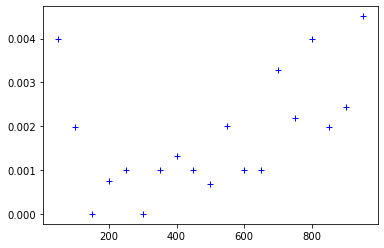

In [109]:
times, sizes = [], []
for i in range(50, 1000, 50):
    A = np.random.rand(i,i)

    power_time = time.time()
    power_method(A)
    power_time = time.time()-power_time

    times.append(power_time)
    sizes.append(i)

plt.plot(sizes,times, 'b+')

## 2 odwrotna

In [110]:
def inverse_power_method(A, sigma=0, eps=1e-9, iterations=10000):
    n = A.shape[0]
    x = np.zeros(n)
    x[0] = 1
    LU = lu_factor(A - sigma * np.eye(n))

    for i in range(iterations):
        x_next = lu_solve(LU, x)
        x_next /= np.linalg.norm(x_next)

        if np.linalg.norm(x_next - x) < eps:
            return x_next

        x = x_next

    return x

In [111]:
np.random.seed(121)
M = np.random.rand(3,3)

np_time = time.time()
eig_value, eig_vectors = np.linalg.eig(M)
np_time = time.time() - np_time

print(eig_value)
print(eig_vectors)

print("\nsigma 1.3")
print(inverse_power_method(M, 1.3))
print("\nsigma 0.2")
print(inverse_power_method(M, 0.2))
print("\nsigma -0.3")
print(inverse_power_method(M, -0.3))


[ 1.26738788  0.16784213 -0.24522129]
[[ 0.2613728   0.60135871 -0.4079797 ]
 [ 0.70547755 -0.51445262 -0.27284462]
 [ 0.6587759   0.61131514  0.87126826]]

sigma 1.3
[0.2613728  0.70547755 0.6587759 ]

sigma 0.2
[ 0.60135871 -0.51445262  0.61131514]

sigma -0.3
[ 0.4079797   0.27284462 -0.87126826]
